# Predicting the Next Hit Song

#### Alexandra Barker

## Data Cleaning

### Import libraries

In [ ]:
import pandas as pd
import numpy as np

### Import datasets as dataframes

In [ ]:
df_60 = pd.read_csv("data/dataset-of-60s.csv")
df_70 = pd.read_csv("data/dataset-of-70s.csv")
df_80 = pd.read_csv("data/dataset-of-80s.csv")
df_90 = pd.read_csv("data/dataset-of-90s.csv")
df_00 = pd.read_csv("data/dataset-of-00s.csv")
df_10 = pd.read_csv("data/dataset-of-10s.csv")
df_all = pd.read_csv("data/dataset-alldecades.csv")

### Analyze the datasets

In [ ]:
df_all.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [ ]:
df_all.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


 -------------------------------------------------

### Data Cleaning

After analyzing the data, there are a few adjustments we need to make. The data is already relatively clean, but we do need to:

1. Adjust tracks where the loudnesses is above 0.0 (range is -60 to 0)
2. Convert duration from milliseconds to minutes
3. Drop Etta James' Trust in Me, an outlier with erroneous measurements

In [ ]:
df_all.loc[df_all['loudness'] > 0.0]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
8680,Search and Destroy - Iggy Pop Mix,The Stooges,spotify:track:00sydAz6PeOxYzwG1dRIPi,0.235,0.977,6,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133,4,19.04955,11,0,70s
11118,Like A Sunday Morning,Lana Cantrell,spotify:track:3jjBnB7v3HpQ0VD4A3QE5U,0.363,0.884,3,2.291,1,0.0375,0.104000,0.000000,0.1500,0.4760,81.470,189989,4,29.23695,9,1,70s
12143,Gimme Danger - Alternate 'Violent' Iggy Mix,The Stooges,spotify:track:77bHrxVX3E2SWopfaoWrTw,0.378,0.951,3,0.450,0,0.0566,0.003290,0.419000,0.1350,0.2490,132.060,213093,4,43.98334,10,0,70s
14711,Death Trip - Iggy Pop Mix,The Stooges,spotify:track:7bqn4e3nGorbHDgP3yL9G7,0.228,0.998,2,1.963,1,0.1530,0.006160,0.221000,0.0746,0.0768,155.804,367133,4,26.65973,17,0,70s
16291,Your Pretty Face Is Going to Hell - Alternate ...,The Stooges,spotify:track:0Aveu2KsriohUafrrerz1F,0.186,0.997,9,3.744,1,0.1540,0.000467,0.020200,0.0644,0.1070,157.047,294467,4,37.49109,13,0,70s
29478,Dance of Lust,Freakshow,spotify:track:1ZlCP70vdRmQI4qMvPpXIS,0.452,0.983,2,1.137,0,0.0694,0.001360,0.000192,0.1330,0.5560,148.829,216880,4,52.53548,13,0,00s


In [ ]:
df_70.loc[df_70['loudness'] > 0.0, 'loudness'] = 0.0
df_00.loc[df_00['loudness'] > 0.0, 'loudness'] = 0.0
df_all.loc[df_all['loudness'] > 0.0, 'loudness'] = 0.0

Every track with a loudness above 0 was adjusted to 0.0

In [ ]:
df_all.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s
5,Beat n. 3,Ennio Morricone,spotify:track:32VBSoD2vcoIOiPEvAfFXU,0.697,0.673,0,-10.573,1,0.0266,0.7140,0.919000,0.1220,0.778,112.117,167667,4,65.48604,7,0,60s
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.3600,0.228000,0.0963,0.591,143.507,134360,4,47.82155,7,0,60s
7,Happy Days,Marv Johnson,spotify:track:0ecGwZA1ReAq4Mn3ZInaT4,0.720,0.624,5,-9.086,0,0.0473,0.7950,0.000000,0.4880,0.887,119.999,160040,4,30.42891,8,1,60s
8,Carolina - Remastered 2006,Caetano Veloso,spotify:track:15gNqKkZN9Mq9AvnRqWJKb,0.545,0.220,2,-15.079,0,0.0828,0.5820,0.239000,0.2690,0.386,118.223,158413,4,47.08099,6,0,60s
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.0385,0.000002,0.1420,0.685,128.336,157293,4,43.36534,9,1,60s


Change the duration measurement from milliseconds to minutes

In [ ]:
df_60["duration_ms"] = df_60["duration_ms"]/60000
df_60 = df_60.rename(columns = {"duration_ms":"duration_min"})

df_70["duration_ms"] = df_70["duration_ms"]/60000
df_70 = df_70.rename(columns = {"duration_ms":"duration_min"})

df_80["duration_ms"] = df_80["duration_ms"]/60000
df_80 = df_80.rename(columns = {"duration_ms":"duration_min"})

df_90["duration_ms"] = df_90["duration_ms"]/60000
df_90 = df_90.rename(columns = {"duration_ms":"duration_min"})

df_00["duration_ms"] = df_00["duration_ms"]/60000
df_00 = df_00.rename(columns = {"duration_ms":"duration_min"})

df_10["duration_ms"] = df_10["duration_ms"]/60000
df_10 = df_10.rename(columns = {"duration_ms":"duration_min"})

df_all["duration_ms"] = df_all["duration_ms"]/60000
df_all = df_all.rename(columns = {"duration_ms":"duration_min"})

In [ ]:
df_60.loc[df_60["danceability"] == 0]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,chorus_hit,sections,target
6857,Trust In Me,Etta James,spotify:track:5Zu9mG353GB3p26t7M5AmR,0.0,0.377,10,-6.777,0,0.0,0.776,0.0,0.39,0.0,0.0,2.97445,0,26.02934,7,1


In [ ]:
df_60 = df_60.drop(df_60[df_60.danceability == 0].index)

Since the outlier is just one track, we decided to just drop the record

### Write new files with cleaned data

In [ ]:
df_60.to_csv("data/dataset-of-60s-clean.csv", sep = ",", index = False)
df_70.to_csv("data/dataset-of-70s-clean.csv", sep = ",", index = False)
df_80.to_csv("data/dataset-of-80s-clean.csv", sep = ",", index = False)
df_90.to_csv("data/dataset-of-90s-clean.csv", sep = ",", index = False)
df_00.to_csv("data/dataset-of-00s-clean.csv", sep = ",", index = False)
df_10.to_csv("data/dataset-of-10s-clean.csv", sep = ",", index = False)
df_all.to_csv("data/dataset-alldecades-clean.csv", sep = ",", index = False)

# Exploratory Data Analysis

### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pingouin
import sklearn
import statsmodels as stats

Import datasets as dataframes

In [ ]:
df_60 = pd.read_csv("data/dataset-of-60s-clean.csv")
df_70 = pd.read_csv("data/dataset-of-70s-clean.csv")
df_80 = pd.read_csv("data/dataset-of-80s-clean.csv")
df_90 = pd.read_csv("data/dataset-of-90s-clean.csv")
df_00 = pd.read_csv("data/dataset-of-00s-clean.csv")
df_10 = pd.read_csv("data/dataset-of-10s-clean.csv")
df_all = pd.read_csv("data/dataset-alldecades-clean.csv")

Check the datasets

In [ ]:
df_all.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,2.892217,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,3.560217,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,3.732667,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,2.631783,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,4.093333,4,21.79874,14,0,60s


In [ ]:
df_all.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221780,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,3.914626,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311078,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.982790,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,0.252800,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,2.882129,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,3.631783,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,4.446217,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,0.000000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,69.503783,5.000000,433.182000,169.000000,1.000000


### Let's explore the features of the dataset

Text(0.5, 1.0, 'Popularity Based on Time Signature')

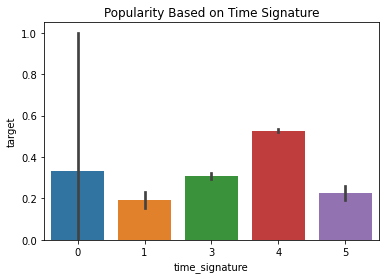

In [ ]:
sns.barplot(x = "time_signature", y = "target", data = df_all)
plt.title("Popularity Based on Time Signature")

Text(0.5, 1.0, 'Popularity Based on Key')

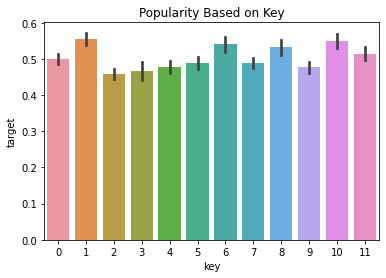

In [ ]:
sns.barplot(x = "key", y = "target", data = df_all)
plt.title("Popularity Based on Key")

Text(0.5, 1.0, 'Popularity Based on Mode')

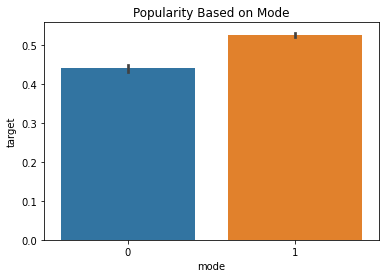

In [ ]:
sns.barplot(x = "mode", y = "target", data = df_all)
plt.title("Popularity Based on Mode")

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

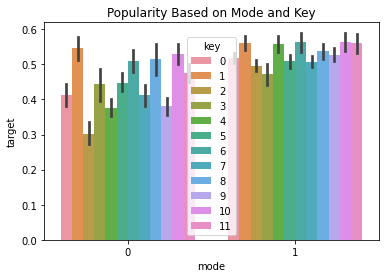

In [ ]:
sns.barplot(x = "mode", y = "target", hue = "key", data = df_all)
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
plt.title("Popularity Based on Mode and Key")

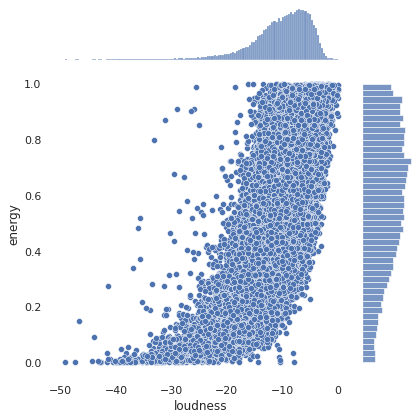

In [ ]:
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
sns.jointplot(x = "loudness", y = "energy", data = df_all)

Text(0.5, 1.0, 'Density Distribution of Track Energy')

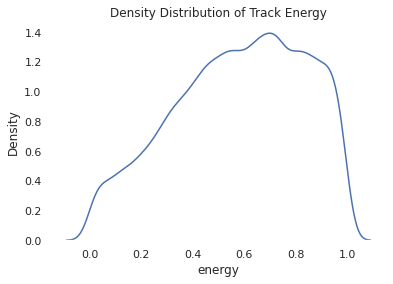

In [ ]:
sns.kdeplot(data = df_all, x = "energy")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.title("Density Distribution of Track Energy")

Text(0.5, 1.0, 'Density Distribution of Track Duration')

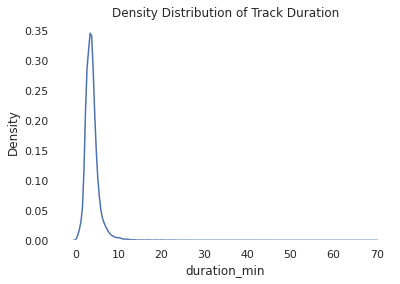

In [ ]:
sns.kdeplot(data = df_all, x = "duration_min")
plt.title("Density Distribution of Track Duration")

Text(0.5, 1.0, 'Density Distribution of Danceability')

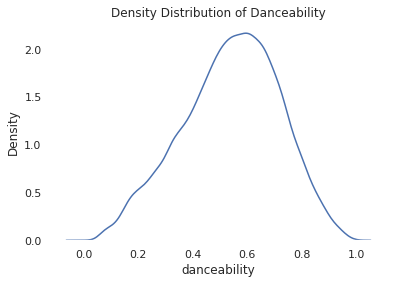

In [ ]:
sns.kdeplot(data = df_all, x = "danceability")
plt.title("Density Distribution of Danceability")

Text(0.5, 1.0, 'Acousticness for Popular Songs')

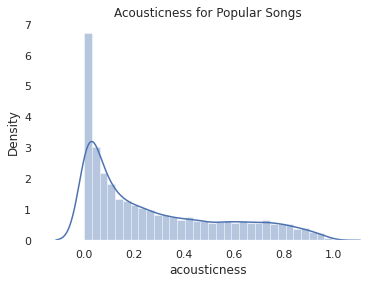

In [ ]:
popular_tracks = df_all[df_all.target == 1]
sns.distplot(popular_tracks["acousticness"])
plt.title("Acousticness for Popular Songs")

Text(0.5, 1.0, 'Acousticness for Unpopular Songs')

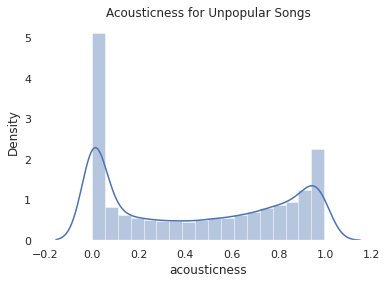

In [ ]:
unpopular_tracks = df_all[df_all.target == 0]
sns.distplot(unpopular_tracks["acousticness"])
plt.title("Acousticness for Unpopular Songs")

Text(0.5, 1.0, 'Loudness for Popular Songs')

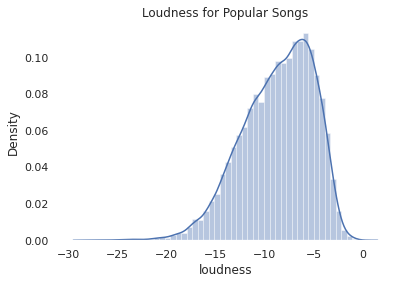

In [ ]:
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
sns.distplot(popular_tracks["loudness"])
plt.title("Loudness for Popular Songs")

Text(0.5, 1.0, 'Loudness for Popular Songs')

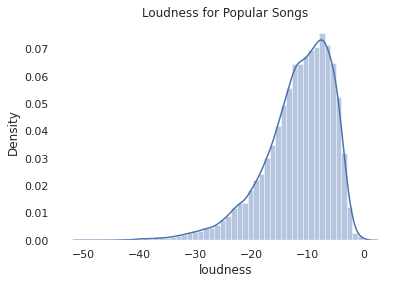

In [ ]:
sns.distplot(unpopular_tracks["loudness"])
plt.title("Loudness for Popular Songs")

It doesn't look like loudness or acousticness have strong correlations

Text(0.5, 1.0, 'Danceability for Popular Songs')

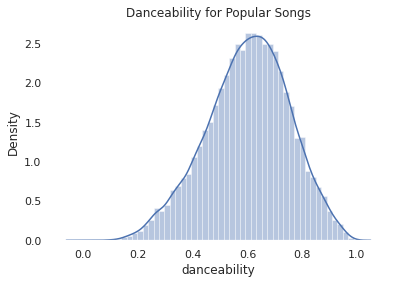

In [ ]:
sns.distplot(popular_tracks["danceability"])
plt.title("Danceability for Popular Songs")

Text(0.5, 1.0, 'Danceability for Unpopular Songs')

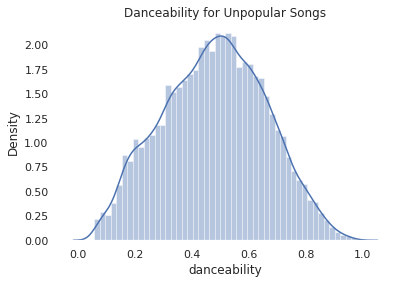

In [ ]:
sns.distplot(unpopular_tracks["danceability"])
plt.title("Danceability for Unpopular Songs")

In [ ]:
df_all.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,chorus_hit,sections,target
danceability,1.000000,0.206128,0.015433,0.274260,-0.032743,0.156452,-0.261252,-0.301915,-0.115251,0.553858,-0.066541,-0.063030,0.191664,-0.036277,-0.058615,0.346097
energy,0.206128,1.000000,0.022523,0.772634,-0.033780,0.122430,-0.715088,-0.208153,0.157779,0.341427,0.224018,0.011830,0.196072,0.009620,-0.040233,0.177142
key,0.015433,0.022523,1.000000,0.008440,-0.140455,0.026515,-0.024178,-0.013101,0.000668,0.007742,0.001154,0.015493,0.004757,0.010264,0.006784,0.009883
loudness,0.274260,0.772634,0.008440,1.000000,0.000493,0.069227,-0.566558,-0.374325,0.086743,0.271856,0.169440,-0.049907,0.165525,-0.013387,-0.080094,0.286091
mode,-0.032743,-0.033780,-0.140455,0.000493,1.000000,-0.059636,0.049961,-0.075992,0.008886,0.035636,0.027053,-0.074828,-0.009483,-0.022594,-0.057095,0.079614
speechiness,0.156452,0.122430,0.026515,0.069227,-0.059636,1.000000,-0.083948,-0.084092,0.131488,0.001528,0.036854,0.007631,0.021085,0.012972,-0.008636,-0.040835
acousticness,-0.261252,-0.715088,-0.024178,-0.566558,0.049961,-0.083948,1.000000,0.204137,-0.030765,-0.195331,-0.179700,-0.070271,-0.188139,-0.012409,-0.016824,-0.246036
instrumentalness,-0.301915,-0.208153,-0.013101,-0.374325,-0.075992,-0.084092,0.204137,1.000000,-0.050582,-0.287047,-0.053618,0.106551,-0.077980,0.048654,0.081188,-0.407638
liveness,-0.115251,0.157779,0.000668,0.086743,0.008886,0.131488,-0.030765,-0.050582,1.000000,0.000784,0.024861,0.005336,0.004773,0.037981,-0.011742,-0.051445
valence,0.553858,0.341427,0.007742,0.271856,0.035636,0.001528,-0.195331,-0.287047,0.000784,1.000000,0.107901,-0.172166,0.155669,-0.059120,-0.133527,0.251147


<AxesSubplot: >

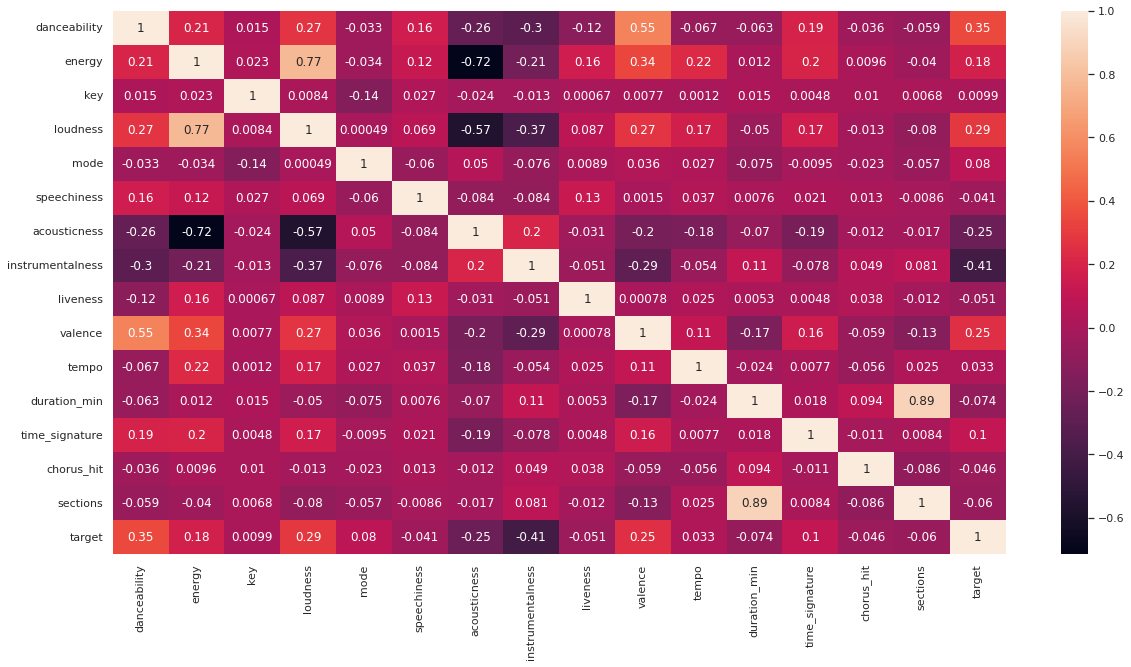

In [ ]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
sns.heatmap(df_all.corr(), annot=True)

In [ ]:
#sns.pairplot(df_60, vars=["loudness", "energy", "danceability", "mode", "valence"])

In [ ]:
#sns.pairplot(df_70, vars=["loudness", "energy", "danceability", "mode", "valence"])

In [ ]:
#sns.pairplot(df_80, vars=["loudness", "energy", "danceability", "mode", "valence"])

In [ ]:
#sns.pairplot(df_90, vars=["loudness", "energy", "danceability", "mode", "valence"])

In [ ]:
#sns.pairplot(df_00, vars=["loudness", "energy", "danceability", "mode", "valence"])

In [ ]:
#sns.pairplot(df_10, vars=["loudness", "energy", "danceability", "mode", "valence"])

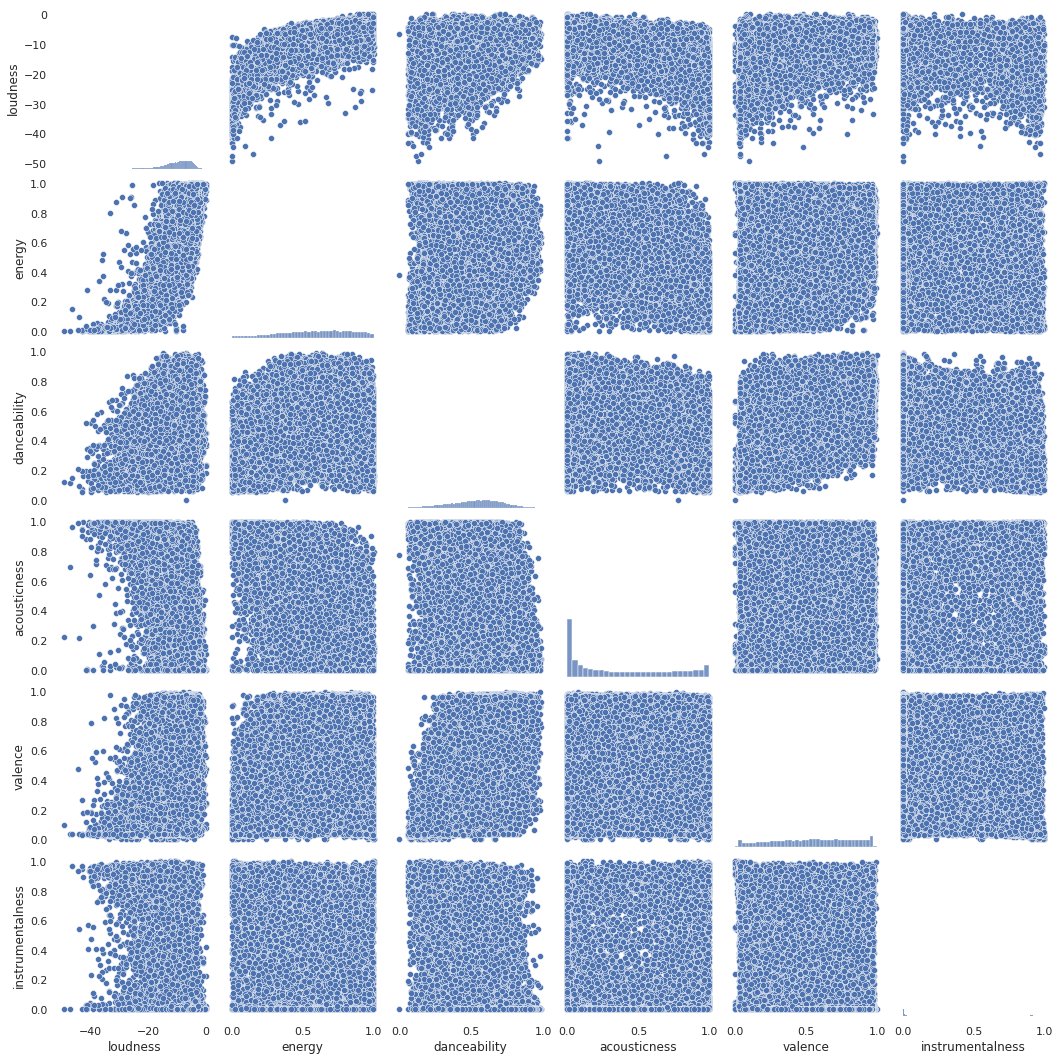

In [ ]:
sns.pairplot(df_all, vars=["loudness", "energy", "danceability", "acousticness", "valence", "instrumentalness"])

In [ ]:
x = df_all["target"]
y = df_all["loudness"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.2860905819653716, pvalue=0.0)

In [ ]:
x = df_all["target"]
y = df_all["valence"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.2511465541533678, pvalue=0.0)

In [ ]:
x = df_all["target"]
y = df_all["acousticness"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.24603585149115118, pvalue=0.0)

In [ ]:
x = df_all["target"]
y = df_all["energy"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.17714231422552543, pvalue=5.987111564305385e-287)

In [ ]:
x = df_all["target"]
y = df_all["danceability"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.3460965964716159, pvalue=0.0)

------------------------------

And we test all the other features

------------------------------

In [ ]:
x = df_all["target"]
y = df_all["instrumentalness"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.407638196036455, pvalue=0.0)

In [ ]:
x = df_all["target"]
y = df_all["speechiness"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.04083546562905497, pvalue=1.206807801269485e-16)

In [ ]:
x = df_all["target"]
y = df_all["liveness"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.05144505498528498, pvalue=1.6824912752305346e-25)

In [ ]:
x = df_all["target"]
y = df_all["duration_min"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.07381952897473842, pvalue=8.980976712537334e-51)

In [ ]:
x = df_all["target"]
y = df_all["key"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.009882524794862374, pvalue=0.04510951529918765)

In [ ]:
x = df_all["target"]
y = df_all["tempo"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.03264878320011925, pvalue=3.5682852809657235e-11)

In [ ]:
x = df_all["target"]
y = df_all["mode"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.07961369225079741, pvalue=8.683578546896273e-59)

In [ ]:
x = df_all["target"]
y = df_all["time_signature"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.10488402869651421, pvalue=6.943437119767178e-101)

In [ ]:
x = df_all["target"]
y = df_all["chorus_hit"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.04640850436628118, pvalue=4.779192361839046e-21)

In [ ]:
x = df_all["target"]
y = df_all["sections"]
scipy.stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.05999704904451196, pvalue=4.2359495808905845e-34)

<AxesSubplot: >

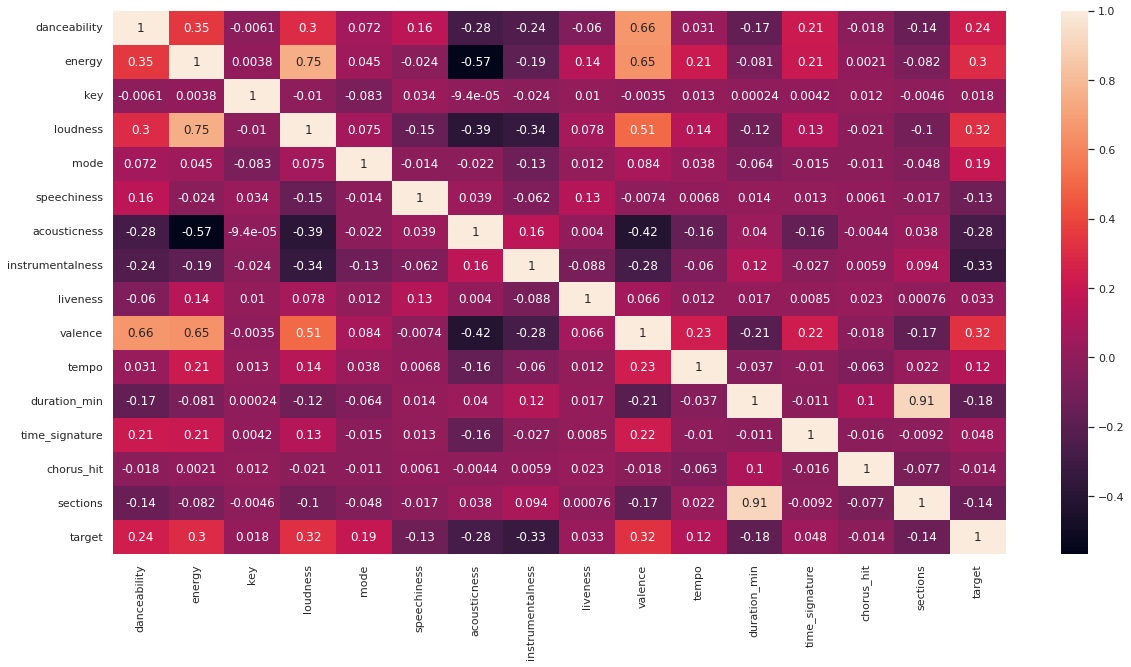

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_60.corr(), annot=True)

<AxesSubplot: >

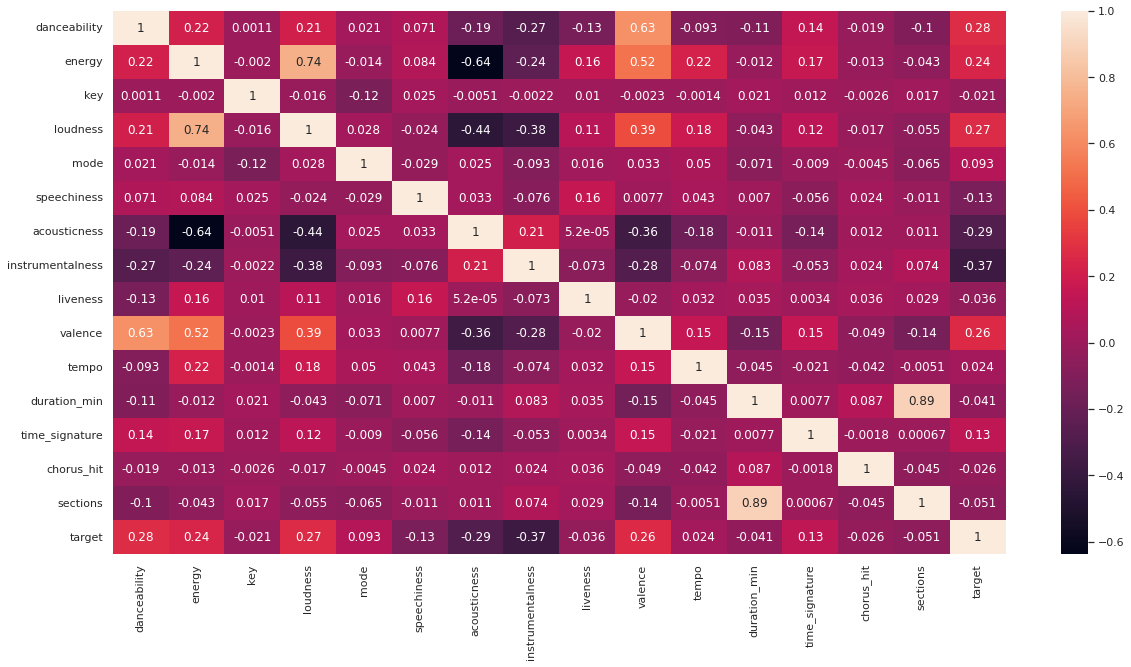

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_70.corr(), annot=True)

<AxesSubplot: >

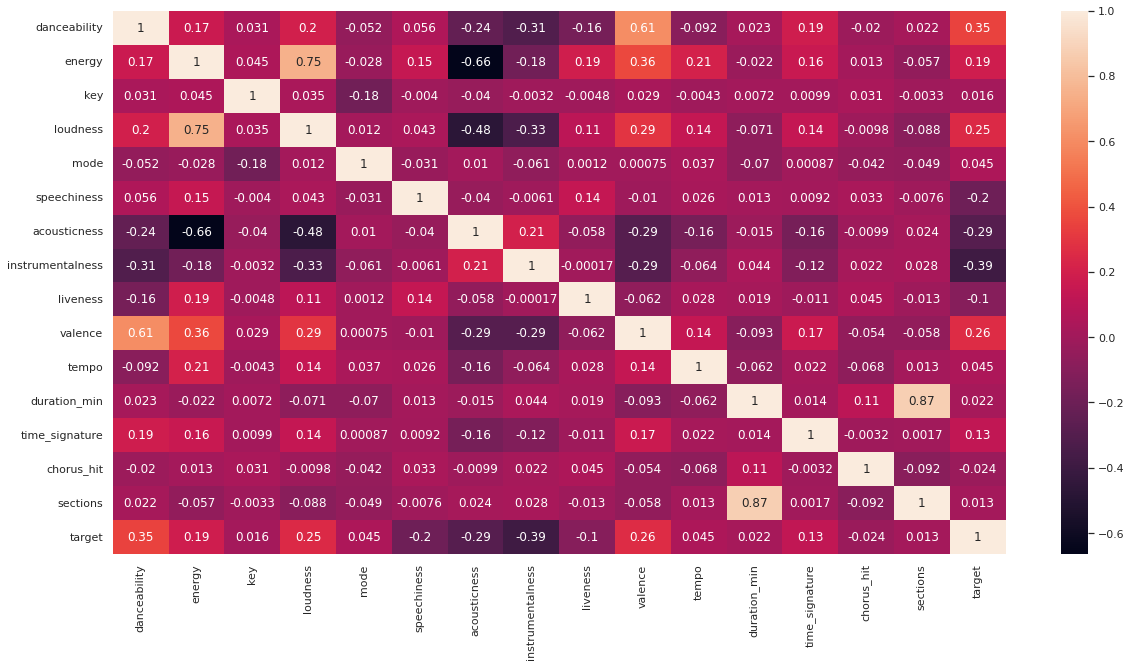

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_80.corr(), annot=True)

<AxesSubplot: >

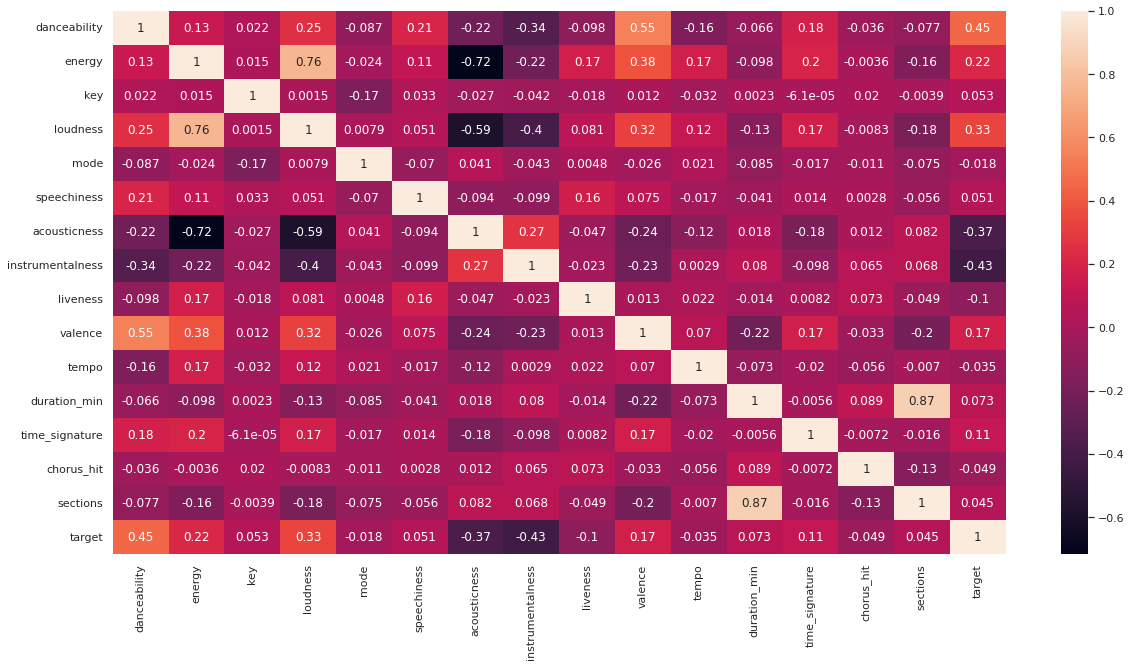

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_90.corr(), annot=True)

<AxesSubplot: >

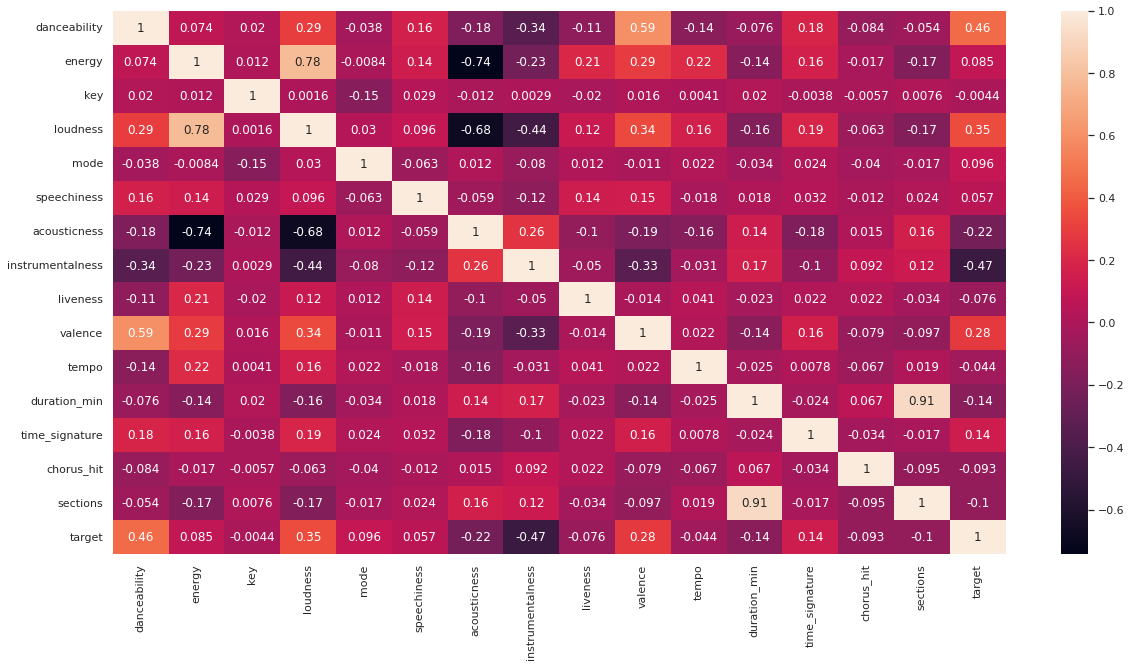

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_00.corr(), annot=True)

<AxesSubplot: >

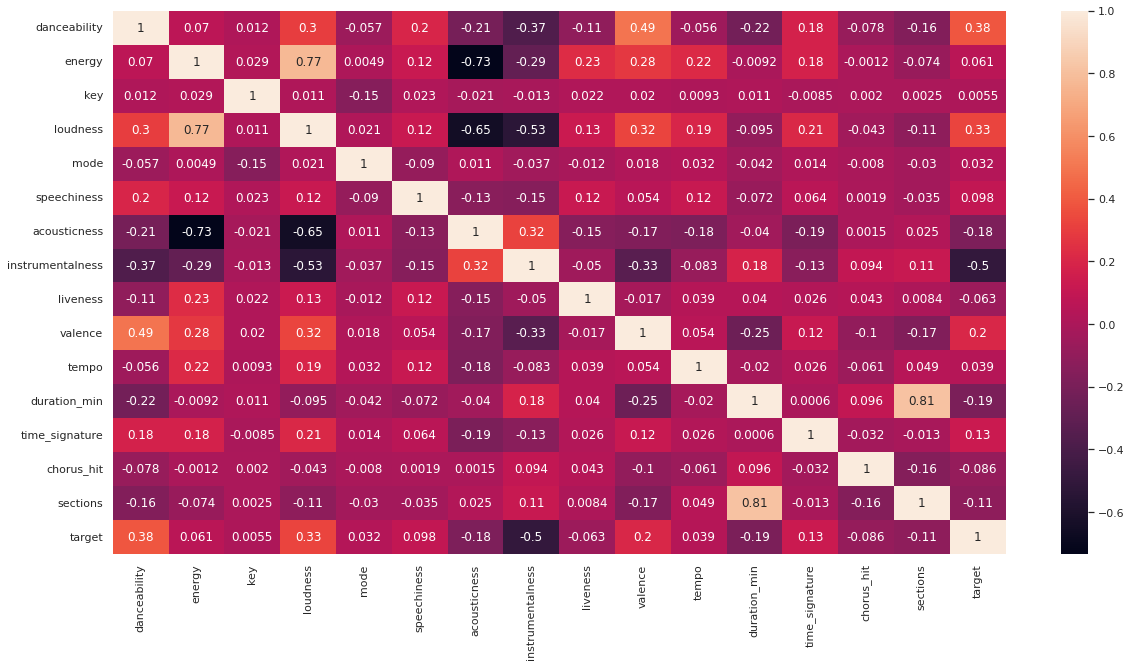

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_10.corr(), annot=True)

------------------------------------------------------------

## Model 1: Linear Regression

------------------------------------------------------------

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn import tree
from numpy import mean, absolute, sqrt

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature', 'chorus_hit',
       'sections']
x = df_all[features]
y = df_all["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 8)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.2598722832945003

In [ ]:
y_predictor = model.predict(x_test)

print("R2 = ", metrics.r2_score(y_test, y_predictor))
print("MAE = ", metrics.mean_absolute_error(y_test, y_predictor))
print("MSE = ", metrics.mean_squared_error(y_test, y_predictor))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

R2 =  0.2598722832945003
MAE =  0.38849556909165184
MSE =  0.1849950986682591
RMSE =  0.4301105656319769


------------------------------------------------------------

## Model 2: Logistic Regression

------------------------------------------------------------

In [ ]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.7258574556069083

In [ ]:
log_pred = model2.predict(x_test)

print("Coefficient: ", model2.coef_)
print("Intercept: ", model2.intercept_)

Coefficient:  [[ 2.23735132e+00 -1.48576478e+00  1.62010167e-02  8.51529536e-02
   3.72205452e-01 -7.71785454e-01 -1.18929603e+00 -3.56034216e+00
  -6.86962184e-01  5.21203756e-01  2.38662168e-03 -8.66324247e-02
   1.46164516e-01  7.65305720e-04  2.57760429e-02]]
Intercept:  [0.01051335]


In [ ]:
accuracy = model2.score(x_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7258574556069083


---------------------------------------------------------

## Model 3: Decision Tree Classifier

----------------------------------------------------------

Create a training and testing set

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature', 'chorus_hit',
       'sections']
x = df_all[features]
y = df_all["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 8)

In [ ]:
tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 8, max_depth = 8, min_samples_leaf = 5)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=8)

In [ ]:
tree_ypredict = tree_model.predict(x_test)

In [ ]:
accuracy_score(y_test, tree_ypredict)

0.7591826806129895

In [ ]:
np.mean(cross_val_score(tree_model, x, y, cv = 5))

0.7257601971042531

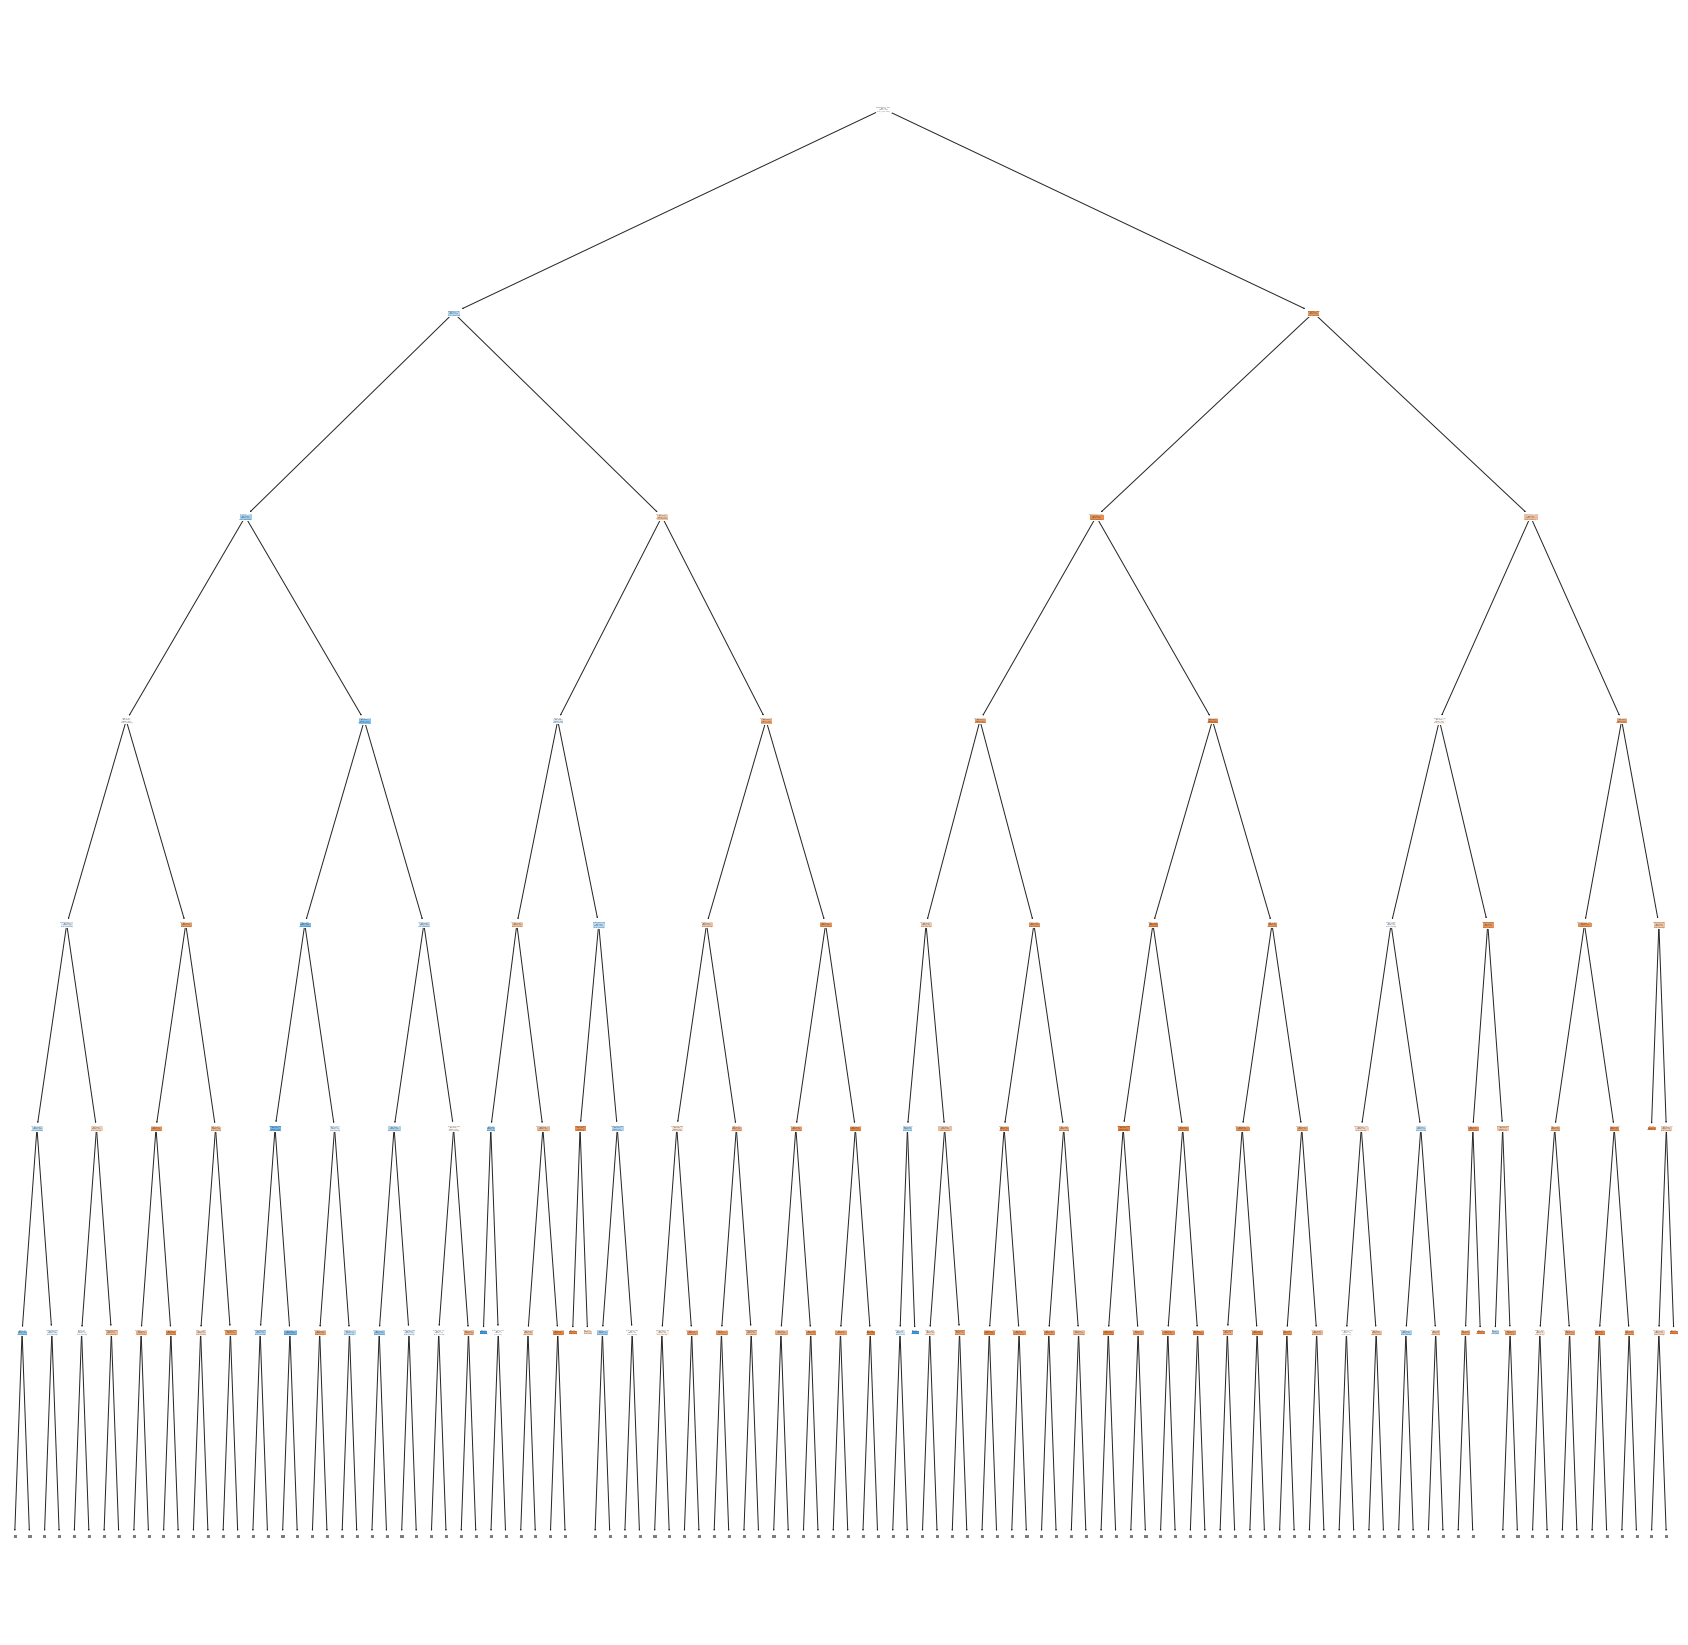

In [ ]:
plt.figure(figsize = (30, 30))
plot = tree.plot_tree(tree_model, feature_names = features, filled = True, max_depth = 6)
plt.show()

--------------------------------------------------------------------

## Model 4: Random Forest

--------------------------------------------------------------------

In [ ]:
forest_model = RandomForestClassifier(n_estimators = 100)

In [ ]:
forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
forest_ypredict = forest_model.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, forest_ypredict)

0.7926295305278521

In [ ]:
np.mean(cross_val_score(forest_model, x, y, cv = 5))

0.7513287118136474

## Confusion matrix

In [ ]:
cmat = confusion_matrix(y_test, forest_ypredict)
print(cmat)
true_neg, false_pos, false_neg, true_pos = cmat.ravel()
print(true_neg, false_pos, false_neg, true_pos)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
accuracy = ((true_neg+true_pos)/(true_neg+false_pos+false_neg+true_pos))
print('Accuracy Score: {}'.format(accuracy))
print('Misclassification Rate: {}'.format((false_pos+false_neg)/(true_neg+false_pos+false_neg+true_pos)))

[[3014 1039]
 [ 666 3503]]
3014 1039 666 3503
TP - True Negative 3014
FP - Flase Positive 1039
FN - False Negative 666
TP - True Positive 3503
Accuracy Score: 0.7926295305278521
Misclassification Rate: 0.2073704694721479


## Feature Importance

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature', 'chorus_hit',
       'sections']

In [ ]:
pd.DataFrame({'feature':features, 'importance':forest_model.feature_importances_}).sort_values(by = 'importance', ascending = False)

,feature,importance
7,instrumentalness,0.167861
6,acousticness,0.110455
0,danceability,0.102524
1,energy,0.083054
3,loudness,0.076750
5,speechiness,0.074324
11,duration_min,0.073479
9,valence,0.072147
10,tempo,0.054129
8,liveness,0.051526


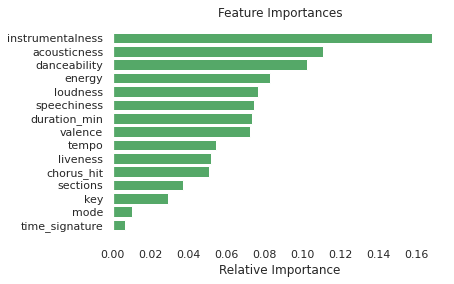

In [ ]:
importances = forest_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig("filename.png", transparent=True)
plt.show()